In [1]:
import pandas as pd


In [2]:
# Next I load the Iris data set into a data frame using df in pandas
# A DataFrame is a 2 dimensional data structure, like a 2 dimensional array,or a table with rows and columns.
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')



In [3]:
# We will look at how some of these individual variables look different charts and plots.
# In order to do this, we must import matplotlib, it is a library for data visualization.
import matplotlib.pyplot as plt

In [4]:


# If we want to see the number of each Species column, we can use this:
df["species"].value_counts() 


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


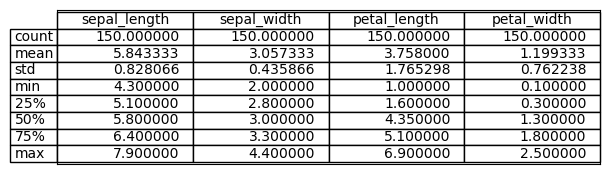

In [6]:
# To save a table into a png file so it can be copied into the Readme file.

from pandas.plotting import table

df = pd.DataFrame()
df['sepal_length'] = ['150.000000', '5.843333', '0.828066', '4.300000', '5.100000', '5.800000', '6.400000', '7.900000']
df['sepal_width'] = ['150.000000', '3.057333', '0.435866', '2.000000', '2.800000', '3.000000', '3.300000', '4.400000']
df['petal_length'] = ['150.000000', '3.758000', '1.765298', '1.000000', '1.600000', '4.350000', '5.100000', '6.900000']
df['petal_width'] = ['150.000000', '1.199333', '0.762238', '0.100000', '0.300000', '1.300000', '1.800000', '2.500000']

index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
df.index = index

plt.figure(figsize=(7, 2))
ax = plt.subplot(111, frame_on=True)  
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, df, loc="center")  # where df is your data frame

plt.savefig("describetable.png")









In [9]:
print(df.isnull())
# Create a DataFrame from the given data
print(df.isnull().sum())

       sepal_length  sepal_width  petal_length  petal_width
count         False        False         False        False
mean          False        False         False        False
std           False        False         False        False
min           False        False         False        False
25%           False        False         False        False
50%           False        False         False        False
75%           False        False         False        False
max           False        False         False        False
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
from io import StringIO

# Capture the output of df.info() into a string - for this String IO section, I could not find why the info section would not print to the file
# So I looked it up on chat GPT and it suggested using this. I did further research and added it to the readme file. 
buffer = StringIO()
df.info(buf=buffer)
info_output = buffer.getvalue()
buffer.close()

# This section I created myself .

with open(r"iris_summary.txt", "w") as f:

    describe = str(df.describe())
    info = str(df.info()) 
    null = str(df.isnull().sum)
    summary =  info_output + "\n\n" + describe + "\n\n" + null

    # Write the summary to the file
    f.write(summary)

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count      8.000000     8.000000      8.000000     8.000000
mean      23.271425    21.124150     21.809162    19.745196
std       51.247114    52.086178     51.835213    52.636648
min        0.828066     0.435866      1.000000     0.100000
25%        4.900000     2.600000      1.723974     0.646678
50%        5.821667     3.028666      4.054000     1.249667
75%        6.775000     3.575000      5.550000     1.975000
max      150.000000   150.000000    150.000000   150.000000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:


# The data set is clean, has no missing values and is ready for analysis.

# We will look at how some of these individual variables look different charts and plots.
# In order to do this, we must import matplotlib, it is a library for data visualization.
import matplotlib.pyplot as plt



#

In [ ]:
#Seaborn can be imported and used by matplotlib to draw its plots
import seaborn as sns
# We can pull in the colour palette from seaborn and set our colours to distinguish the different iris species.

#


In [ ]:
import numpy as np


In [ ]:
# To ignore warnings, re: the figure layout changes, we import the warnings module
import warnings
warnings.filterwarnings('ignore')

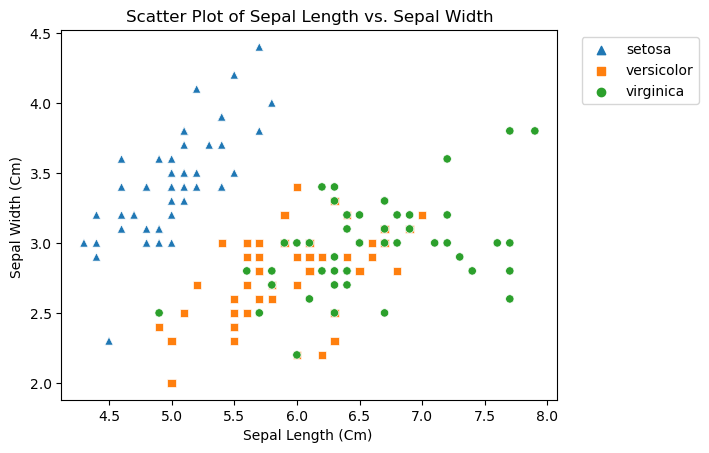

In [ ]:
# Draw a scatterplot of the sepal length vs sepal width and show the plots in different shapes to identify them clearly
sns.scatterplot(df, x="sepal_length", y="sepal_width", hue="species", style="species", markers={"setosa": "^", "versicolor": "s", "virginica": "o"})
plt.title("Scatter Plot of Sepal Length vs. Sepal Width")
plt.xlabel("Sepal Length (Cm) ")
plt.ylabel("Sepal Width (Cm) ")
plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1))
plt.savefig('Scatter plot of Sepal Length vs Sepal Width ', bbox_inches='tight')
plt.show()


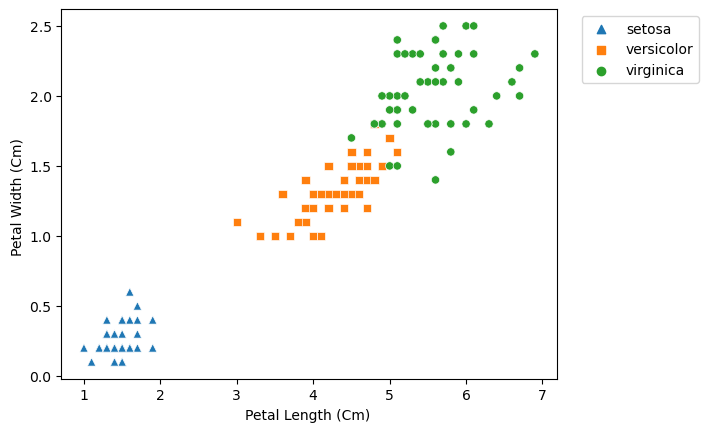

In [ ]:
sns.scatterplot(df, x="petal_length", y="petal_width", hue="species", style="species", markers={"setosa": "^", "versicolor": "s", "virginica": "o"})
plt.xlabel("Petal Length (Cm) ")
plt.ylabel("Petal Width (Cm) ")
plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1)) 
plt.savefig('Scatter plot of Sepal Length vs Sepal Width ', bbox_inches='tight')
plt.show()

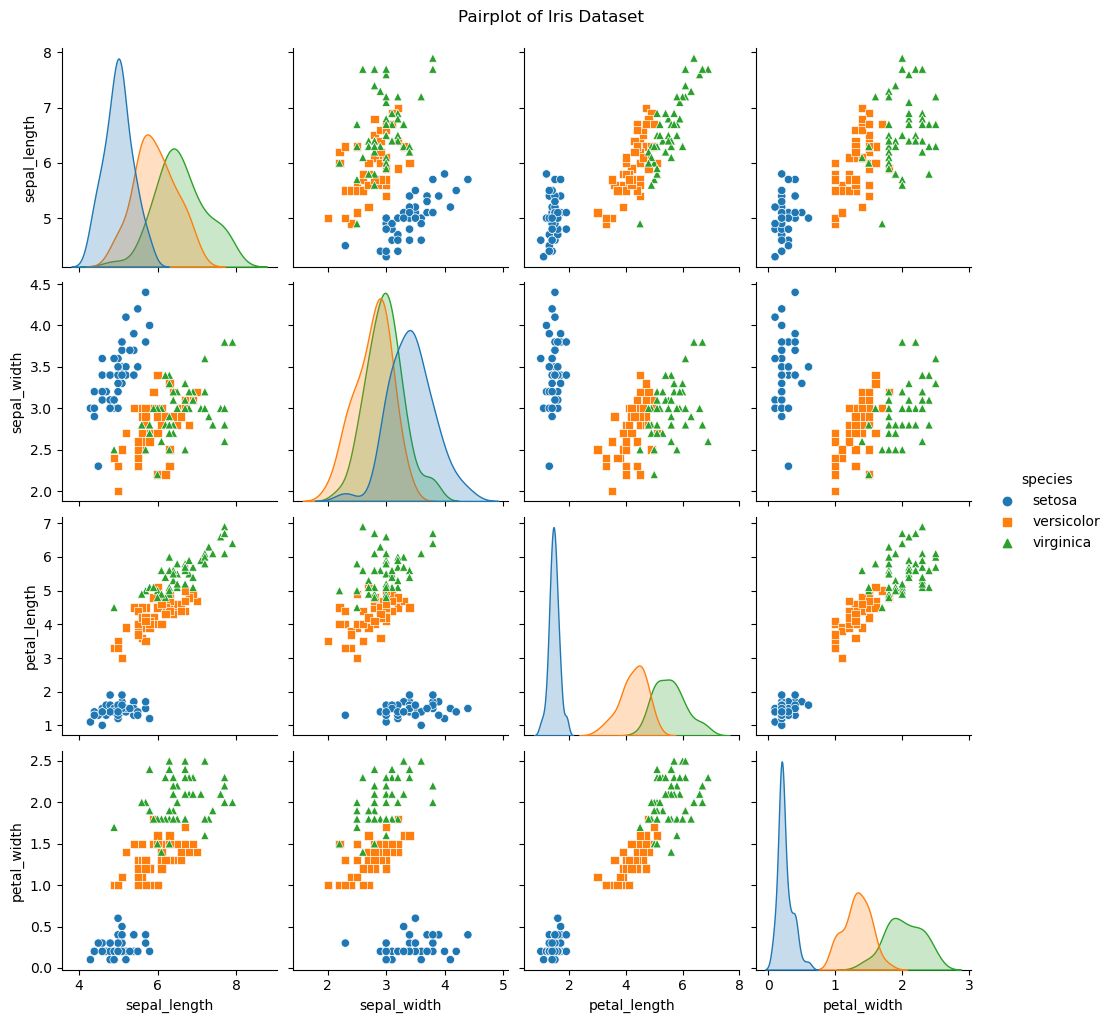

In [ ]:
# Show the variable in a pairplot using seaborn
sns.pairplot(df, hue="species", markers=["o", "s", "^"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.savefig('Pairplot of Iris Dataset', bbox_inches='tight')
plt.show()
  
  


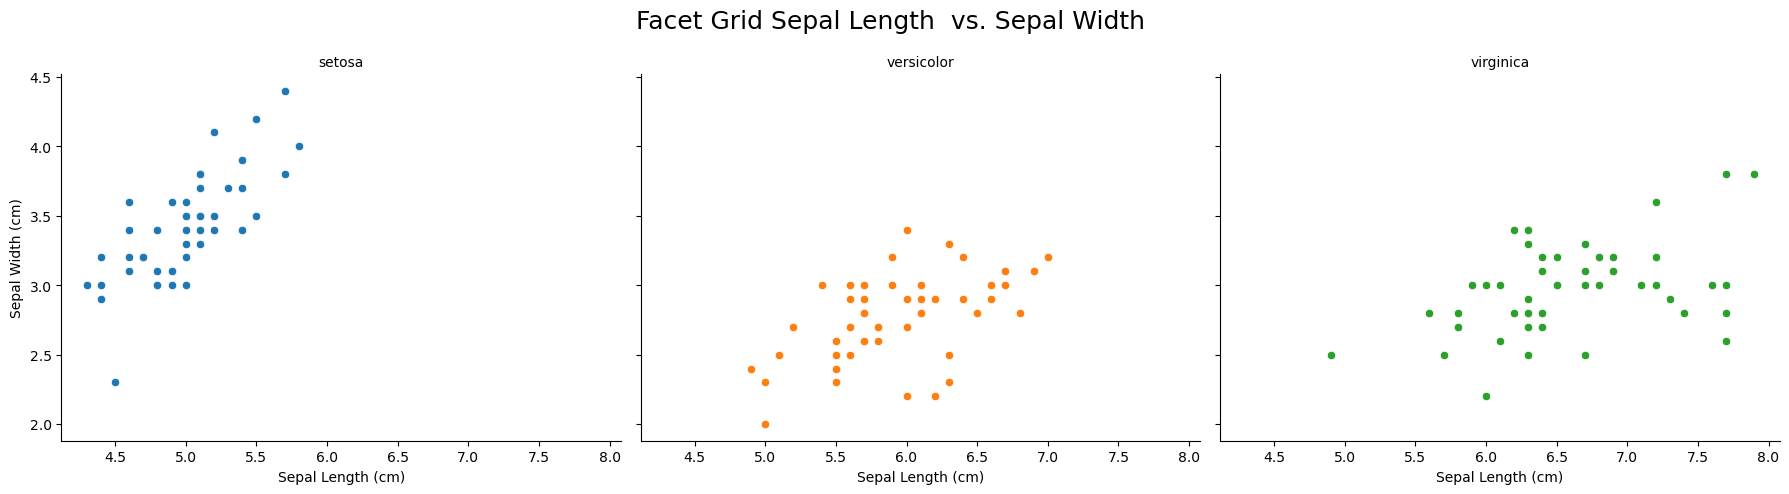

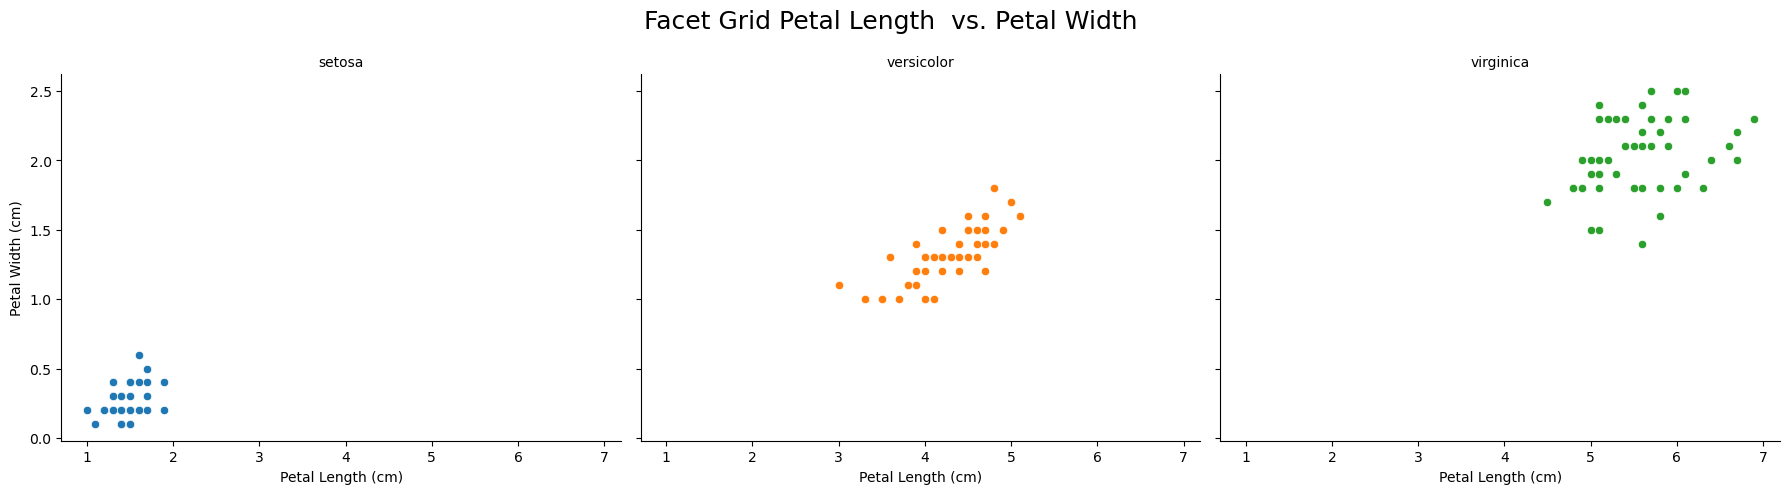

In [ ]:
# From the scatterplot, 
# We can show the scatterplots separately using facet grids:

g = sns.FacetGrid(df, col="species",  hue="species", height=5, aspect=1.2)
g.map(sns.scatterplot, "sepal_length", "sepal_width")
g.set_axis_labels("Sepal Length (cm)", "Sepal Width (cm)")
g.set_titles("{col_name}")

plt.subplots_adjust(top=0.85) 
plt.suptitle("Facet Grid Sepal Length  vs. Sepal Width ", fontsize=18)
plt.savefig('Facet Grid Scatter plot of Sepal Length vs Sepal Width of Iris Species', bbox_inches='tight')
plt.show()

g = sns.FacetGrid(df, col="species",  hue="species", height=5, aspect=1.2)
g.map(sns.scatterplot, "petal_length", "petal_width")
g.set_axis_labels("Petal Length (cm)", "Petal Width (cm)")
g.set_titles("{col_name}")

plt.subplots_adjust(top=0.85) 
plt.suptitle("Facet Grid Petal Length  vs. Petal Width ", fontsize=18)
plt.savefig('Facet Grid Scatter plot of Petal Length vs Petal Width of Iris Species', bbox_inches='tight')
plt.show()

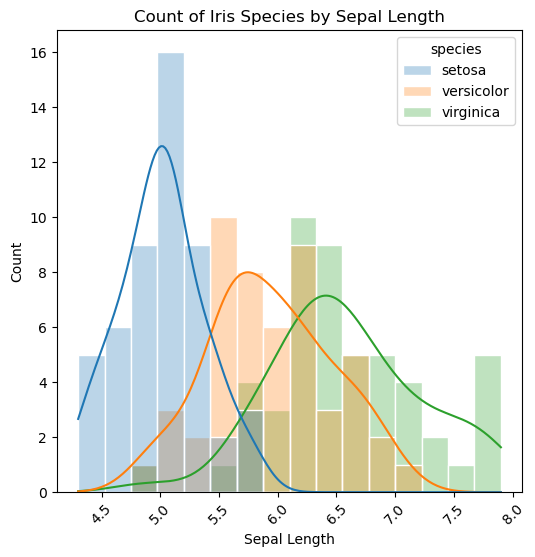

In [ ]:

# Plot
plt.figure(figsize=(6, 6))
sns.histplot(df, x='sepal_length', hue="species", edgecolor = "white", multiple="layer", kde=True, bins=16, alpha=0.3)
plt.title('Count of Iris Species by Sepal Length')
plt.legend
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.savefig('Count of Iris Species by Sepal Length')
plt.show()

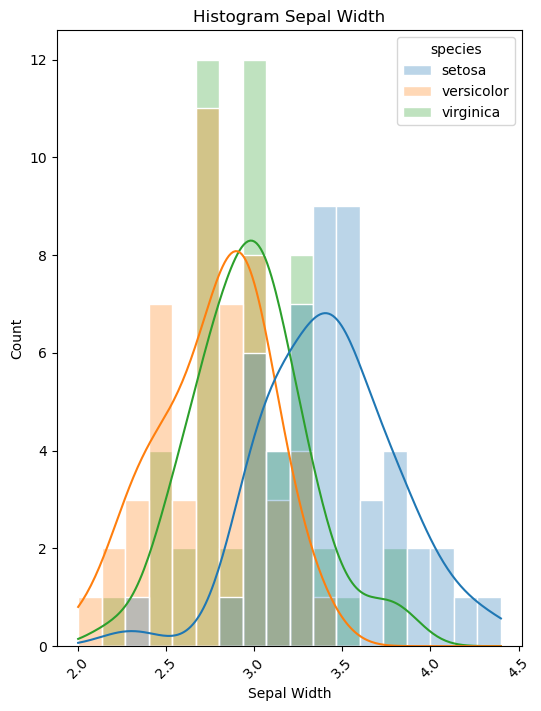

In [ ]:
plt.figure(figsize=(6, 8))
sns.histplot(df, x='sepal_width', hue="species", edgecolor = "white", multiple="layer", kde=True, bins=18, alpha=0.3)
plt.title('Histogram Sepal Width')
plt.legend
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.savefig('Histogram Sepal Width')
plt.show()

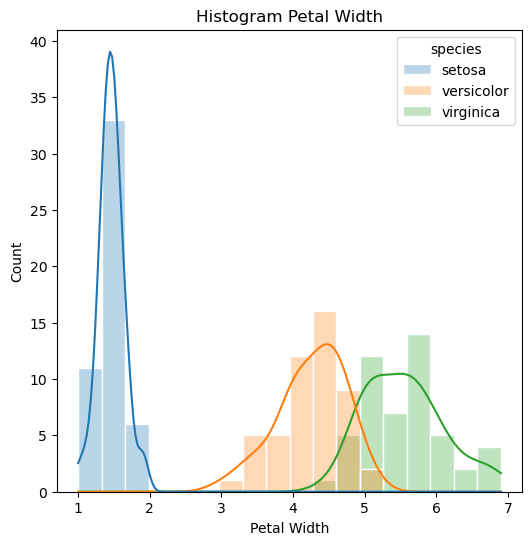

In [ ]:
# Do a histogram of petal width
plt.figure(figsize=(6, 6))
sns.histplot(df, x='petal_length', hue="species", edgecolor = "white", multiple="layer", kde=True, bins=18, alpha=0.3)
plt.title('Histogram Petal Width')
plt.legend
plt.xlabel('Petal Width')
plt.ylabel('Count')

plt.savefig('Histogram Petal Width')
plt.show()


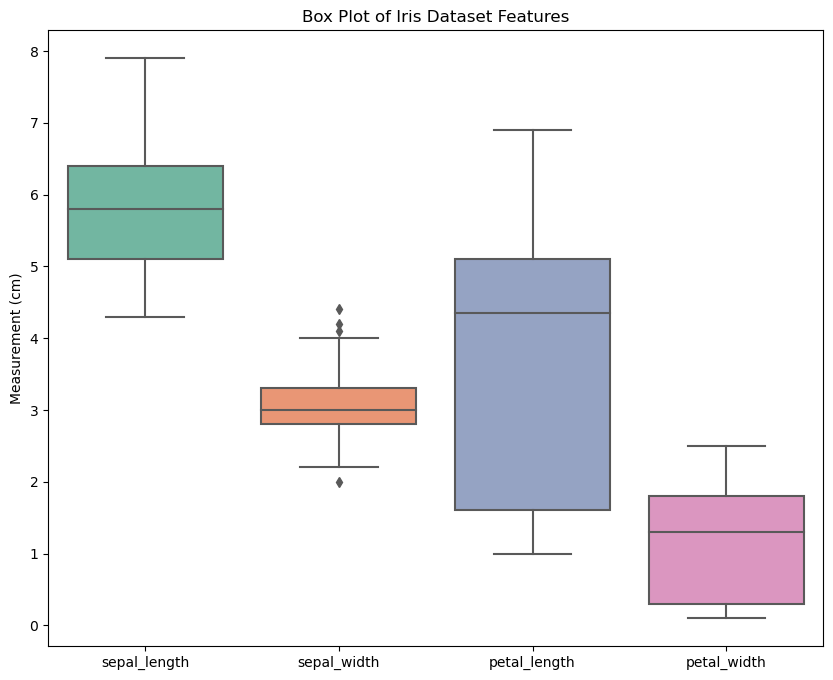

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.ylabel('Measurement (cm)')
plt.title('Box Plot of Iris Dataset Features')
plt.show()

In [ ]:
# Correlation: 
# A correlation exists between two variables when one of them is related to the other in someway.
# The correlation coefficient is a statistical measure of the strength and direction of a linear relationship between two variables.
# A coefficient of 1 shows a perfect positive correlation or a direct relationship. 
# The correlation coefficient between sepal length and sepal width is 0.873
# The correlation coefficient between petal length and petal width is 0.873
# indicates a strong positive linear relationship 
# between the two variables


x = df['sepal_length'].values
y = df['sepal_width'].values

correlation = np.corrcoef(x, y)
print("Correlation coefficient between sepal length and sepal width:", correlation)

f = df['petal_length'].values
g = df['petal_width'].values

correlation2 = np.corrcoef(f, g)
print("Correlation coefficient between petal length and petal width:", correlation2)



Correlation coefficient between sepal length and sepal width: [[ 1.         -0.11756978]
 [-0.11756978  1.        ]]
Correlation coefficient between petal length and petal width: [[1.         0.96286543]
 [0.96286543 1.        ]]


In [ ]:
# To show correlation coefficient for numeric values we can use do a matrix. Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


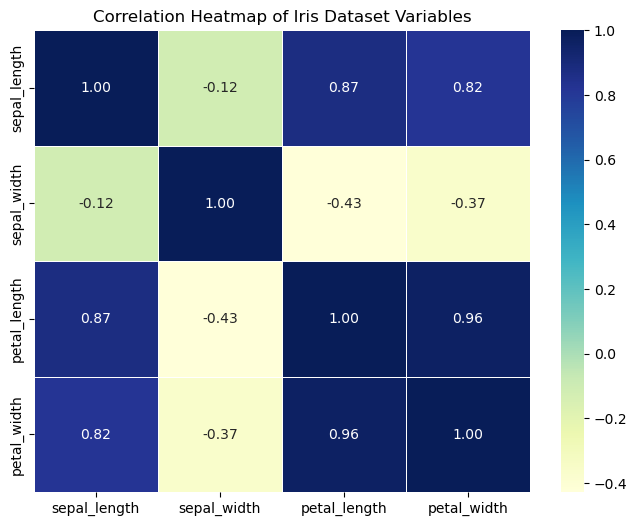

In [ ]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5) # We can use annot to show the values and fmt for decimal places
plt.title('Correlation Heatmap of Iris Dataset Variables')
plt.show()

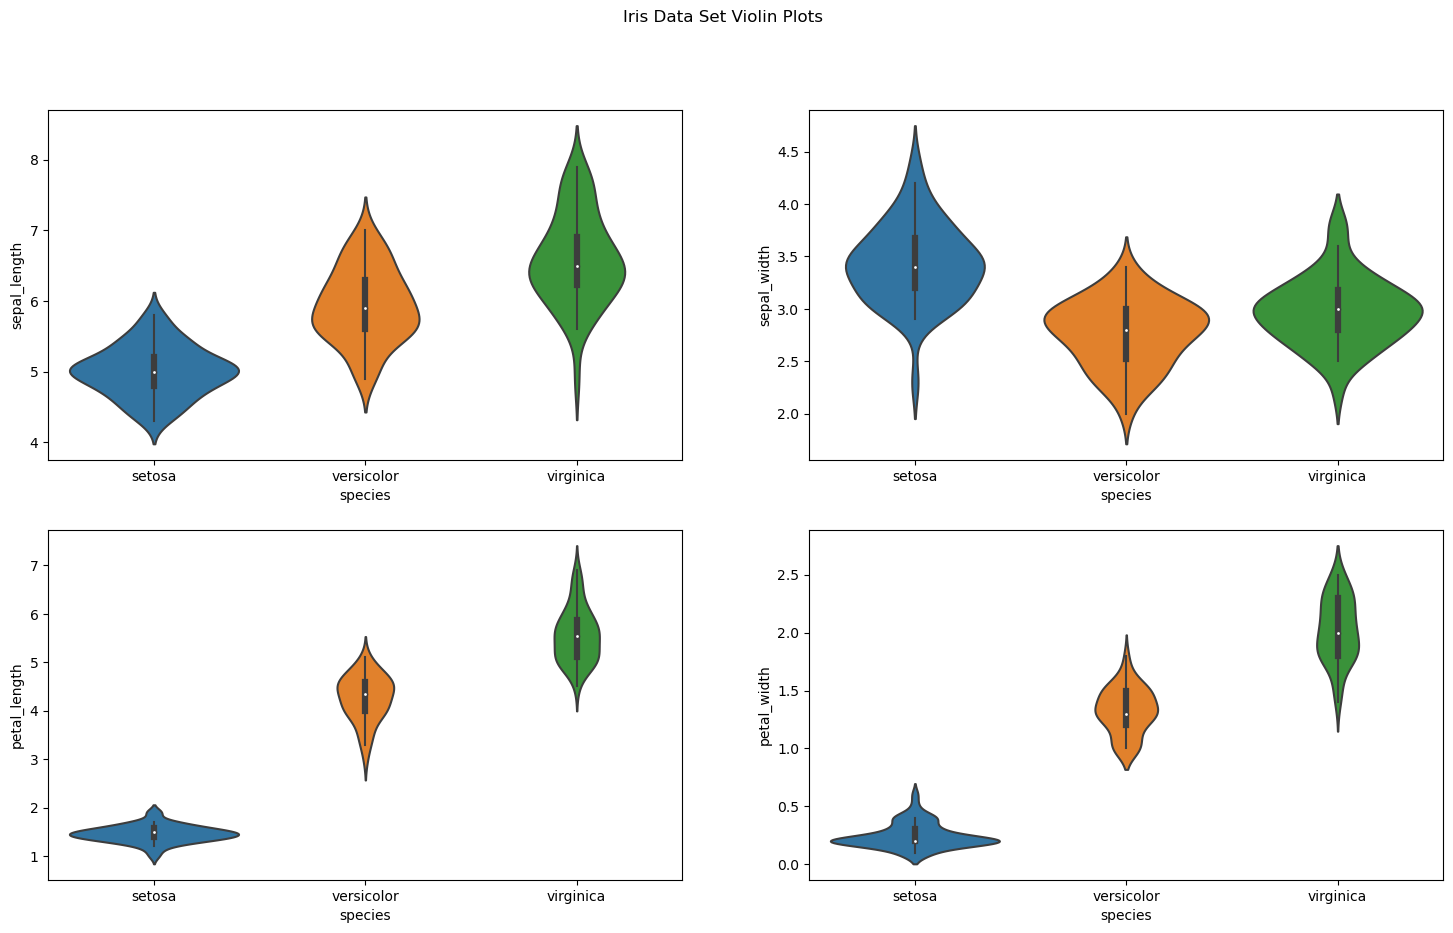

In [ ]:

# Prepare a violin plot for each variable in the Iris Data Set
 
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('Iris Data Set Violin Plots')
 
 
sns.violinplot(df, x='species', y='sepal_length', ax=axes[0, 0] )
sns.violinplot(df, x='species', y='sepal_width', ax=axes[0, 1] )
sns.violinplot(df, x='species', y='petal_length', ax=axes[1, 0] )
sns.violinplot(df, x='species', y='petal_width', ax=axes[1, 1])
plt.show()



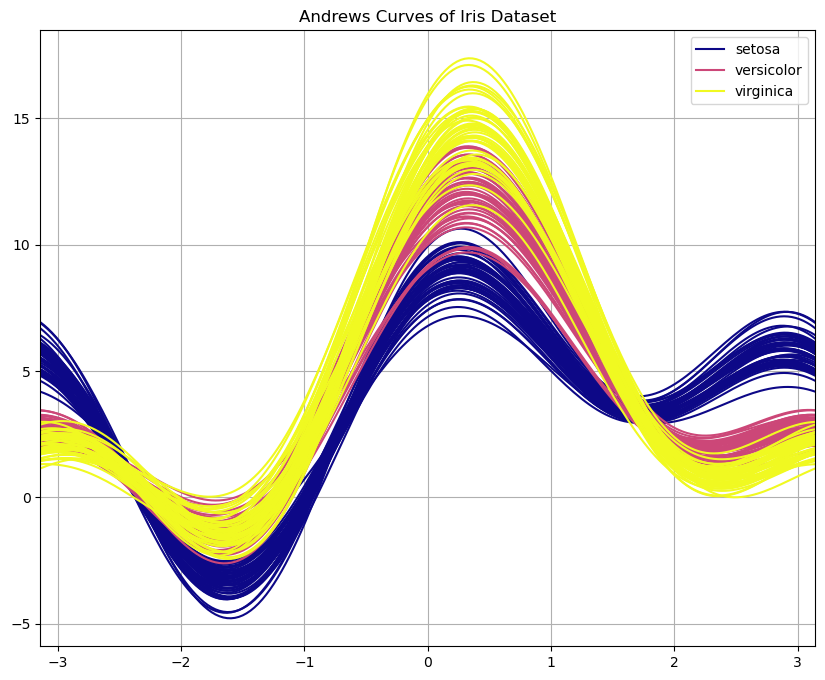

In [ ]:
plt.figure(figsize=(10, 8))
pd.plotting.andrews_curves(df, 'species', colormap='plasma')
plt.title('Andrews Curves of Iris Dataset')
plt.legend(loc='upper right')
plt.show()

AttributeError: 'list' object has no attribute 'isnull'

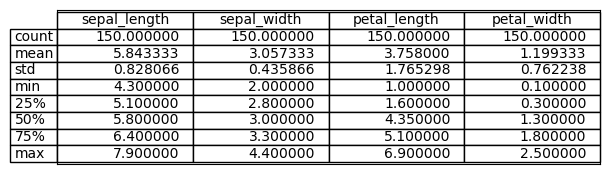

In [8]:
from pandas.plotting import table

df = pd.DataFrame()
df['sepal_length'] = ['150.000000', '5.843333', '0.828066', '4.300000', '5.100000', '5.800000', '6.400000', '7.900000']
df['sepal_width'] = ['150.000000', '3.057333', '0.435866', '2.000000', '2.800000', '3.000000', '3.300000', '4.400000']
df['petal_length'] = ['150.000000', '3.758000', '1.765298', '1.000000', '1.600000', '4.350000', '5.100000', '6.900000']
df['petal_width'] = ['150.000000', '1.199333', '0.762238', '0.100000', '0.300000', '1.300000', '1.800000', '2.500000']

index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
df.index = index

plt.figure(figsize=(7, 2))
ax = plt.subplot(111, frame_on=True)  
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, df, loc="center")  # where df is your data frame

plt.savefig("describetable.png")


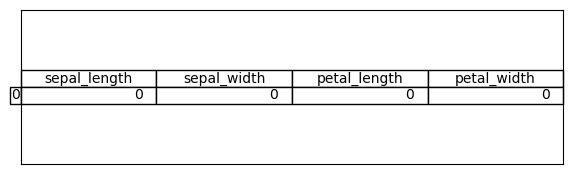

In [10]:
df = {'sepal_length': [0],
        'sepal_width': [0],
        'petal_length': [0],
        'petal_width': [0]}
df_null_sum = pd.DataFrame(df)

# Plotting the table and saving it as an image file
plt.figure(figsize=(7, 2))  # Adjust the figure size as needed
ax = plt.subplot(111, frame_on=True)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax, df_null_sum, loc='center')
plt.savefig("null_sum_table.png")

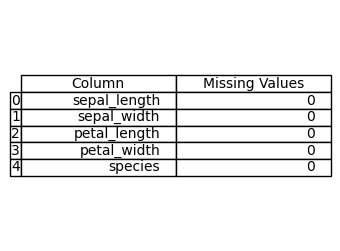

In [18]:
null_counts = {'sepal_length': 0, 'sepal_width': 0, 'petal_length': 0, 'petal_width': 0, 'species':0}
df_null_counts = pd.DataFrame(null_counts.items(), columns=['Column', 'Missing Values'])

# Plotting the table and saving it as an image file
plt.figure(figsize=(4, 3))  # Adjust the figure size as needed
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

table(ax, df_null_counts, loc='center')
plt.savefig("Missing values Table.png")